In [0]:
%pip install tensorflow


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 457.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [0]:
dbutils.library.restartPython()

In [0]:
from tensorflow import keras

2024-09-22 12:58:13.031728: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-22 12:58:13.036626: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-22 12:58:13.051980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 12:58:13.077055: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 12:58:13.084491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 12:58:13.108197: I tensorflow/core/platform/cpu_feature_gu

In [0]:
from tensorflow.keras.models import load_model
#from keras.applications.resnet50 import ResNet50

In [0]:
# Copy the file from DBFS to the local file system (Databricks cluster's /tmp directory)
dbutils.fs.cp("dbfs:/FileStore/models/model_plant_disease.h5", "file:/tmp/model_plant_disease.h5")


True

In [0]:
dbutils.fs.cp("file:/tmp/model_plant_disease.h5", "dbfs:/tmp/model_plant_disease.h5")


True

In [0]:
display(dbutils.fs.ls("/tmp/model_plant_disease.h5"))


path,name,size,modificationTime
dbfs:/tmp/model_plant_disease.h5,model_plant_disease.h5,49780880,1726920050000


Load Model And Process Images

In [0]:
dbutils.fs.cp("dbfs:/tmp/model_plant_disease.h5", "file:/tmp/model_plant_disease.h5")
from tensorflow import keras
model2 = keras.models.load_model("/tmp/model_plant_disease.h5")

In [0]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

In [0]:
# Bring the folder contain test image to local
dbutils.fs.cp("dbfs:/FileStore/shared_uploads/your_email/test", "file:/tmp/test", recurse=True)

True

PIL image size (224, 224)


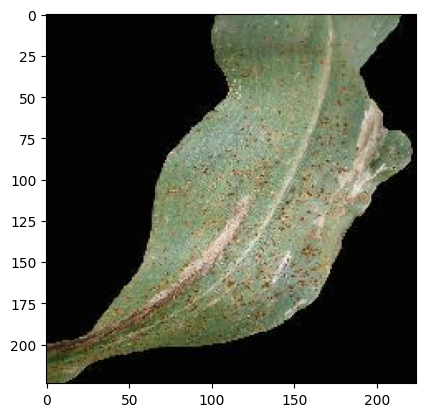

In [0]:
# *Define your image local path
filename ='/tmp/test/CornCommonRust1.JPG'

# load an image in pil format
original = load_img(filename, target_size=(224,224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

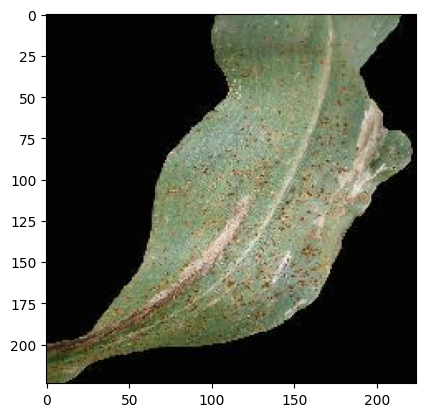

numpy array size (224, 224, 3)


In [0]:
# convert the pil image to a numpy array
# in pil is in (width, height, channel)
# in numpy - image is in (height, width , channel)
import numpy as np

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size', numpy_image.shape)

image batch size (1, 224, 224, 3)


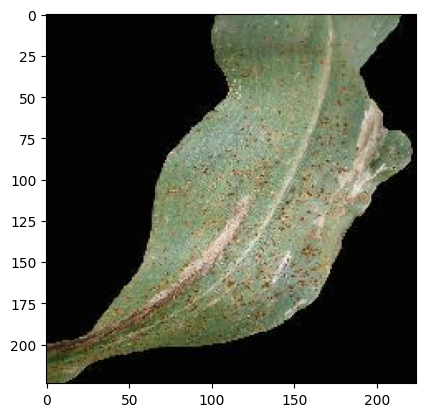

In [0]:
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at
# a particular axis
# we want the input matrix to the network to be of the form
# (batch size, height, width, channels)
# thus we add the extra dimension to the axis 0
image_batch = np.expand_dims(numpy_image, axis = 0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

Start Predicting

In [0]:
""" Since we're using EfficientNetB0, we need to import the preprocess_input function from the tensorflow keras.applications.efficientnet module"""
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

# Preprocess the image for EfficientNetB0
processed_image = preprocess_input(image_batch.copy())

# Get the predicted probabilities for each class
predictions = model2.predict(processed_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


In [0]:
# A list of Leaf class labels, there 38 classes in total
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [0]:
# Get the predicted class index for each sample
top_indices = np.argsort(predictions[0])[::-1][:5]  # Top 5 predictions

In [0]:
# Map the top indices to class labels
top_labels = [(class_labels[i], predictions[0][i]) for i in top_indices]

In [0]:
# Print the top 5 predictions with their probabilities
for label, prob in top_labels:
    print(f"Label: {label}, Probability: {prob}")

Label: Corn_(maize)___Common_rust_, Probability: 0.9999998807907104
Label: Tomato___Late_blight, Probability: 1.3868607595668436e-07
Label: Apple___Apple_scab, Probability: 1.9128987283068e-09
Label: Pepper,_bell___Bacterial_spot, Probability: 6.95263508224131e-12
Label: Tomato___Early_blight, Probability: 1.8882636339950798e-12


PIL image size: (224, 224)


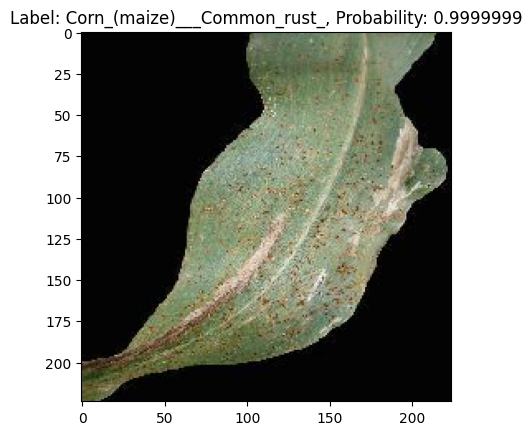

In [0]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Load and display the image
original = load_img(filename, target_size=(224, 224))
print('PIL image size:', original.size)

# Show the image
plt.imshow(original)

# Assuming 'top_labels' contains the predicted class labels and probabilities
plt.title('Label: ' + top_labels[0][0] + ", Probability: " + str(top_labels[0][1]))
plt.show()


Create a function for all the process above

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input

In [0]:
def detect_leaf_disease(filepath, model, class_labels):
    """
    Detect leaf disease from an image file using a pretrained EfficientNetB0 model.

    Parameters:
    filepath (str): The path to the image file.
    model (tf.keras.Model): The pretrained model used for prediction.
    class_labels (list): The list of class labels corresponding to the model's output.

    Returns:
    None: Displays the image along with the top prediction and its probability.
    """
    try:
        # Load and display the image in PIL format
        original = load_img(filepath, target_size=(224, 224))
        print('PIL image size:', original.size)
        plt.imshow(original)
        

        # Convert the image to a numpy array
        numpy_image = img_to_array(original)
        print('Numpy array size:', numpy_image.shape)
        plt.imshow(np.uint8(numpy_image))
        

        # Expand the dimensions of the image to batch format
        image_batch = np.expand_dims(numpy_image, axis=0)
        print('Image batch size:', image_batch.shape)
        plt.imshow(np.uint8(image_batch[0]))

        # Preprocess the image for the model
        processed_image = preprocess_input(image_batch.copy())

        # Get the predicted probabilities for each class
        predictions = model.predict(processed_image)

        # Get the top 5 predictions
        top_indices = np.argsort(predictions[0])[::-1][:5]
        top_labels = [(class_labels[i], predictions[0][i]) for i in top_indices]

        # Display the top predicted label with probability
        # Extract the full label and probability
        full_label = top_labels[0][0]  # e.g., 'Corn_(maize)___Common_rust'
        probability = top_labels[0][1]  # Probability (e.g., 0.85)

        # Split the label by '___' to separate the leaf and disease
        leaf_label, disease_label = full_label.split('___')

        # Format the title to include probability
        title = f"Leaf: {leaf_label}, Diseased: {disease_label}, Probability: {probability:.4f}"

        # Show the image
        plt.imshow(original)
        plt.title(title)
        plt.show()

        # Print all top predictions
        print("Top 5 Predictions:")
        for label, prob in top_labels:
            print(f"Label: {label}, Probability: {prob:.4f}")

    except Exception as e:
        print(f"Error processing the image: {e}")

In [0]:
# Choose the input for our function
filepath ='/tmp/test/CornCommonRust1.JPG'

In [0]:
model = model2

In [0]:
class_labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

PIL image size: (224, 224)
Numpy array size: (224, 224, 3)
Image batch size: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


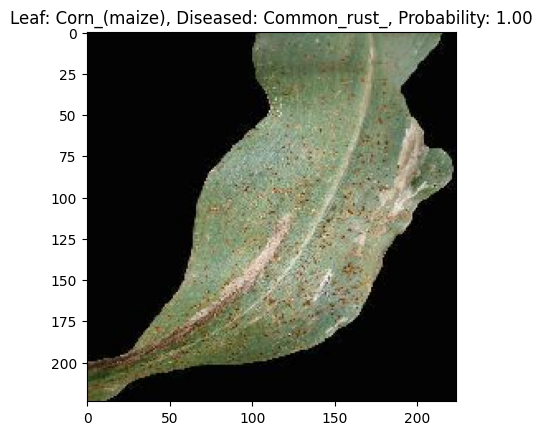

Top 5 Predictions:
Label: Corn_(maize)___Common_rust_, Probability: 1.0000
Label: Tomato___Late_blight, Probability: 0.0000
Label: Apple___Apple_scab, Probability: 0.0000
Label: Pepper,_bell___Bacterial_spot, Probability: 0.0000
Label: Tomato___Early_blight, Probability: 0.0000


In [0]:
# Start the function for predicting
detect_leaf_disease(filepath, model, class_labels)

Test the model with random leaf image from the Internet

In [0]:
# image_dbfs = "dbfs:/image/file/path/name"
# filepath = '/tmp/imagename.jpg'
# Copy the image from DBFS to local
# marssonia_leaf_spot_on_euonymus_grabowski.jpg are download from the Internet and then uploaded to DBFS
image_dbfs = "dbfs:/FileStore/marssonia_leaf_spot_on_euonymus_grabowski.jpg"
dbutils.fs.cp(image_dbfs, "file:/tmp/marssonia_leaf_spot_on_euonymus_grabowski.jpg", recurse=True)

True

In [0]:
# Locate the image location
filepath ='/tmp/marssonia_leaf_spot_on_euonymus_grabowski.jpg'

PIL image size: (224, 224)
Numpy array size: (224, 224, 3)
Image batch size: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


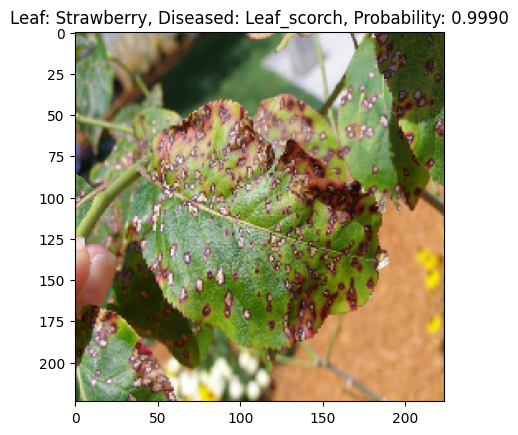

Top 5 Predictions:
Label: Strawberry___Leaf_scorch, Probability: 0.9990
Label: Tomato___healthy, Probability: 0.0004
Label: Pepper,_bell___healthy, Probability: 0.0001
Label: Tomato___Target_Spot, Probability: 0.0001
Label: Raspberry___healthy, Probability: 0.0001


In [0]:
# Start predicting
detect_leaf_disease(filepath, model, class_labels)

Determine the Accuracy Parameter of the model

In [0]:
#Import Libraries
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf, lit
from pyspark.sql.types import BinaryType, StringType, ArrayType, FloatType, DoubleType
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#from tensorflow.keras.models import load_model
#from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
import tensorflow as tf
import io
from PIL import Image
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [0]:
# Initialize Spark Session
spark = SparkSession.builder.appName("TestPlantDiseaseClassification").getOrCreate()

In [0]:
# Load mô hình đã lưu/ Load the saved model
model = model2

In [0]:
# Bring the folder contain train image to local
dbutils.fs.cp("dbfs:/FileStore/shared_uploads/your_email/train", "file:/tmp/train", recurse=True)

True

In [0]:
# Chech how many classes are ther in our train images
data_dir = '/tmp/train'
classes = os.listdir(data_dir)
print(classes)

['Grape___Black_rot', 'Pepper,_bell___Bacterial_spot', 'Strawberry___Leaf_scorch', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Grape___healthy', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___Cedar_apple_rust', 'Pepper,_bell___healthy', 'Peach___healthy', 'Cherry_(including_sour)___healthy', 'Squash___Powdery_mildew', 'Potato___Late_blight', 'Soybean___healthy', 'Blueberry___healthy', 'Strawberry___healthy', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Black_rot', 'Potato___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Bacterial_spot', 'Potato___Early_blight', 'Apple___healthy', 'Tomato___Target_Spot', 'Tomato___Early_blight', 'Apple___Apple_scab

In [0]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


# Create train and test dataset
ds_train = image_dataset_from_directory(
    data_dir,
    validation_split=0.8,  # Use 80% data for training
    subset="training",
    seed=123,
    image_size=(224, 224),  # Kích thước ảnh
    batch_size=None  # Kích thước batch
)

ds_test = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Use 20% data for test
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=None
)

# Lấy thông tin số lượng lớp (categories)
class_names = ds_train.class_names
NUM_CLASSES = len(class_names)

print("Number of classes:", NUM_CLASSES)
print("Class names:", class_names)

Found 7600 files belonging to 38 classes.
Using 1520 files for training.
Found 7600 files belonging to 38 classes.
Using 1520 files for validation.
Number of classes: 38
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bact

In [0]:
# Set Images Dimensions
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [0]:
def format_label(label):
    return label_info[int(label.numpy())]  # Convert labels to numeric value using numpy


label_info = class_names  # Taking class names from ds_info

In [0]:
# Rotate Images from train test
from keras import layers
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]


def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

2024-09-22 13:14:35.102520: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


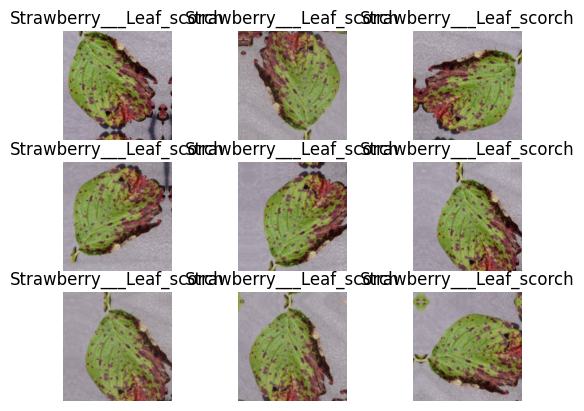

In [0]:
import matplotlib.pyplot as plt
# Show the results
for image, label in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")

In [0]:
# Define batch size for image
BATCH_SIZE = 32
# One-hot / categorical encoding
def input_preprocess_train(image, label):
    image = img_augmentation(image)
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


def input_preprocess_test(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Start encoding
ds_train = ds_train.map(input_preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(batch_size=BATCH_SIZE, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(input_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size=BATCH_SIZE, drop_remainder=True)

In [0]:
# Predict on test model
# Create 2 lists for storing results
y_pred = []
y_true = []

for images, labels in ds_test:
    preds = model2.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))  # Choose label with highest value
    y_true.extend(labels.numpy())            # Save label

# Convert to numpy
y_pred = np.array(y_pred)
y_true = np.array(y_true)

2024-09-22 13:14:47.181820: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-09-22 13:14:47.391552: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-09-22 13:14:47.624198: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


2024-09-22 13:14:50.437393: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-09-22 13:14:50.630478: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 

2024-09-22 13:17:16.125995: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [0]:
# Show results
y_pred

array([34, 32,  1, ..., 17, 13,  1])

In [0]:
y_true

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Convert y_true from one-hot encoding to class labels
y_true_labels = np.argmax(y_true, axis=1)

In [0]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [0]:
# Now calculate precision score
precision = precision_score(y_true_labels, y_pred, average='weighted')

print(f'Precision: {precision}')

Precision: 0.9937915479277785


In [0]:
# Calculate Recall
recall = recall_score(y_true_labels, y_pred, average='weighted')
print(f'Recall: {recall}')

Recall: 0.9933510638297872


In [0]:
# Calculate F1 Score
f1 = f1_score(y_true_labels, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.9933654297396246
